## Naive Bayesian
- The Naive Bayesian classifier is based on Bayes’ theorem with the independence assumptions between predictors. A Naive Bayesian model is easy to build, with no complicated iterative parameter estimation which makes it particularly useful for very large datasets. Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods. 

![](https://www.saedsayad.com/images/Bayes_rule.png)

- Suppose we know that meningitis causes a stiff neck 40% of the time. We also know that the possibility of the general population having meningitis is 1/30,000. Lastly, the incidence of a stiff neck due to any cause is 1/25.


- Considering the facts given above, what is the probability that a person has meningitis, given that they have a stiff neck?

stiff neck: cứng cổ
meningitis: viêm màng não

In [2]:
P_stiffneck_meningitis = 0.4
P_meningitis = 1/30000
P_stiff_neck = 1/25
P_meningitis_stiffneck = (0.4*1/30000)/(1/25)
P_meningitis_stiffneck

0.0003333333333333333

## Example 2
https://www.saedsayad.com/naive_bayesian.htm

# Case study 

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB  #bayesian classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes.rename(columns = {'Pregnancies':'pregnant', 'Glucose':'glucose','BloodPressure':'bp',
                           'SkinThickness':'skin','Insulin':'insulin','BMI':'bmi',
                           'DiabetesPedigreeFunction':'pedigree','Age':'age','Outcome':'label'},inplace =True)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

DecisionTreeClassifier() 0.7037029266357422
RandomForestClassifier() 20.671268701553345
GradientBoostingClassifier() 11.10856318473816


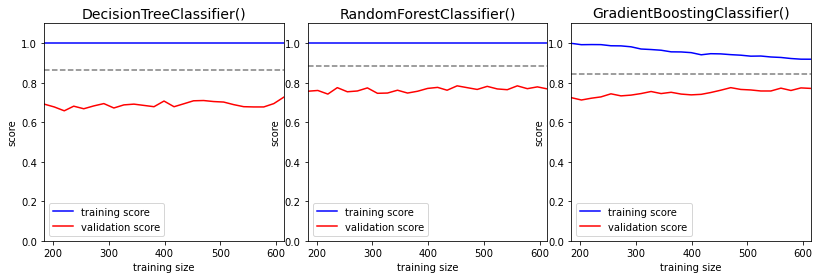

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [DecisionTreeClassifier(), RandomForestClassifier(),GradientBoostingClassifier()]
for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=5,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")

GaussianNB() 0.8729250431060791
MultinomialNB() 1.0020301342010498
BernoulliNB() 1.0755231380462646


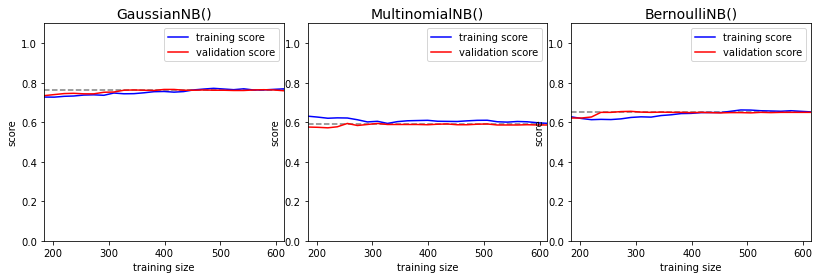

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [GaussianNB(), MultinomialNB(),BernoulliNB()]
for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=5,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")    


- Bayesian classifier tuan theo cong thuc xac suat thong ke -> du bao theo xac suat thong ke, no se fail o nhung observation (row) ko tuan theo xac suat thong ke
-  co nhung benh nhan bi tieu duong nhung trieu chung cua ho ko phai la cua benh nhan tieu duong -> Bayesian classifier se fail

![](https://miro.medium.com/max/1400/1*mzIPUxnxbzdjlJusLnkNRQ.jpeg)

![](https://www.codingame.com/servlet/fileservlet?id=14578829794670)